# Regresión Logística para predecir enfermedad cardíaca | Geordie Quiroa

In [1]:
from typing import List, Callable, Any # para docstrings y typing

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./heart.csv')

In [3]:
seed = 161
df.sample(10, random_state=seed)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1


In [4]:
df.describe() # descripicon estadistica de los datos

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.info() # conteo de valores no nulos por feature.
# no hay valores nulos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
azul, gris = '#A8BABD', '#E1E1E1'

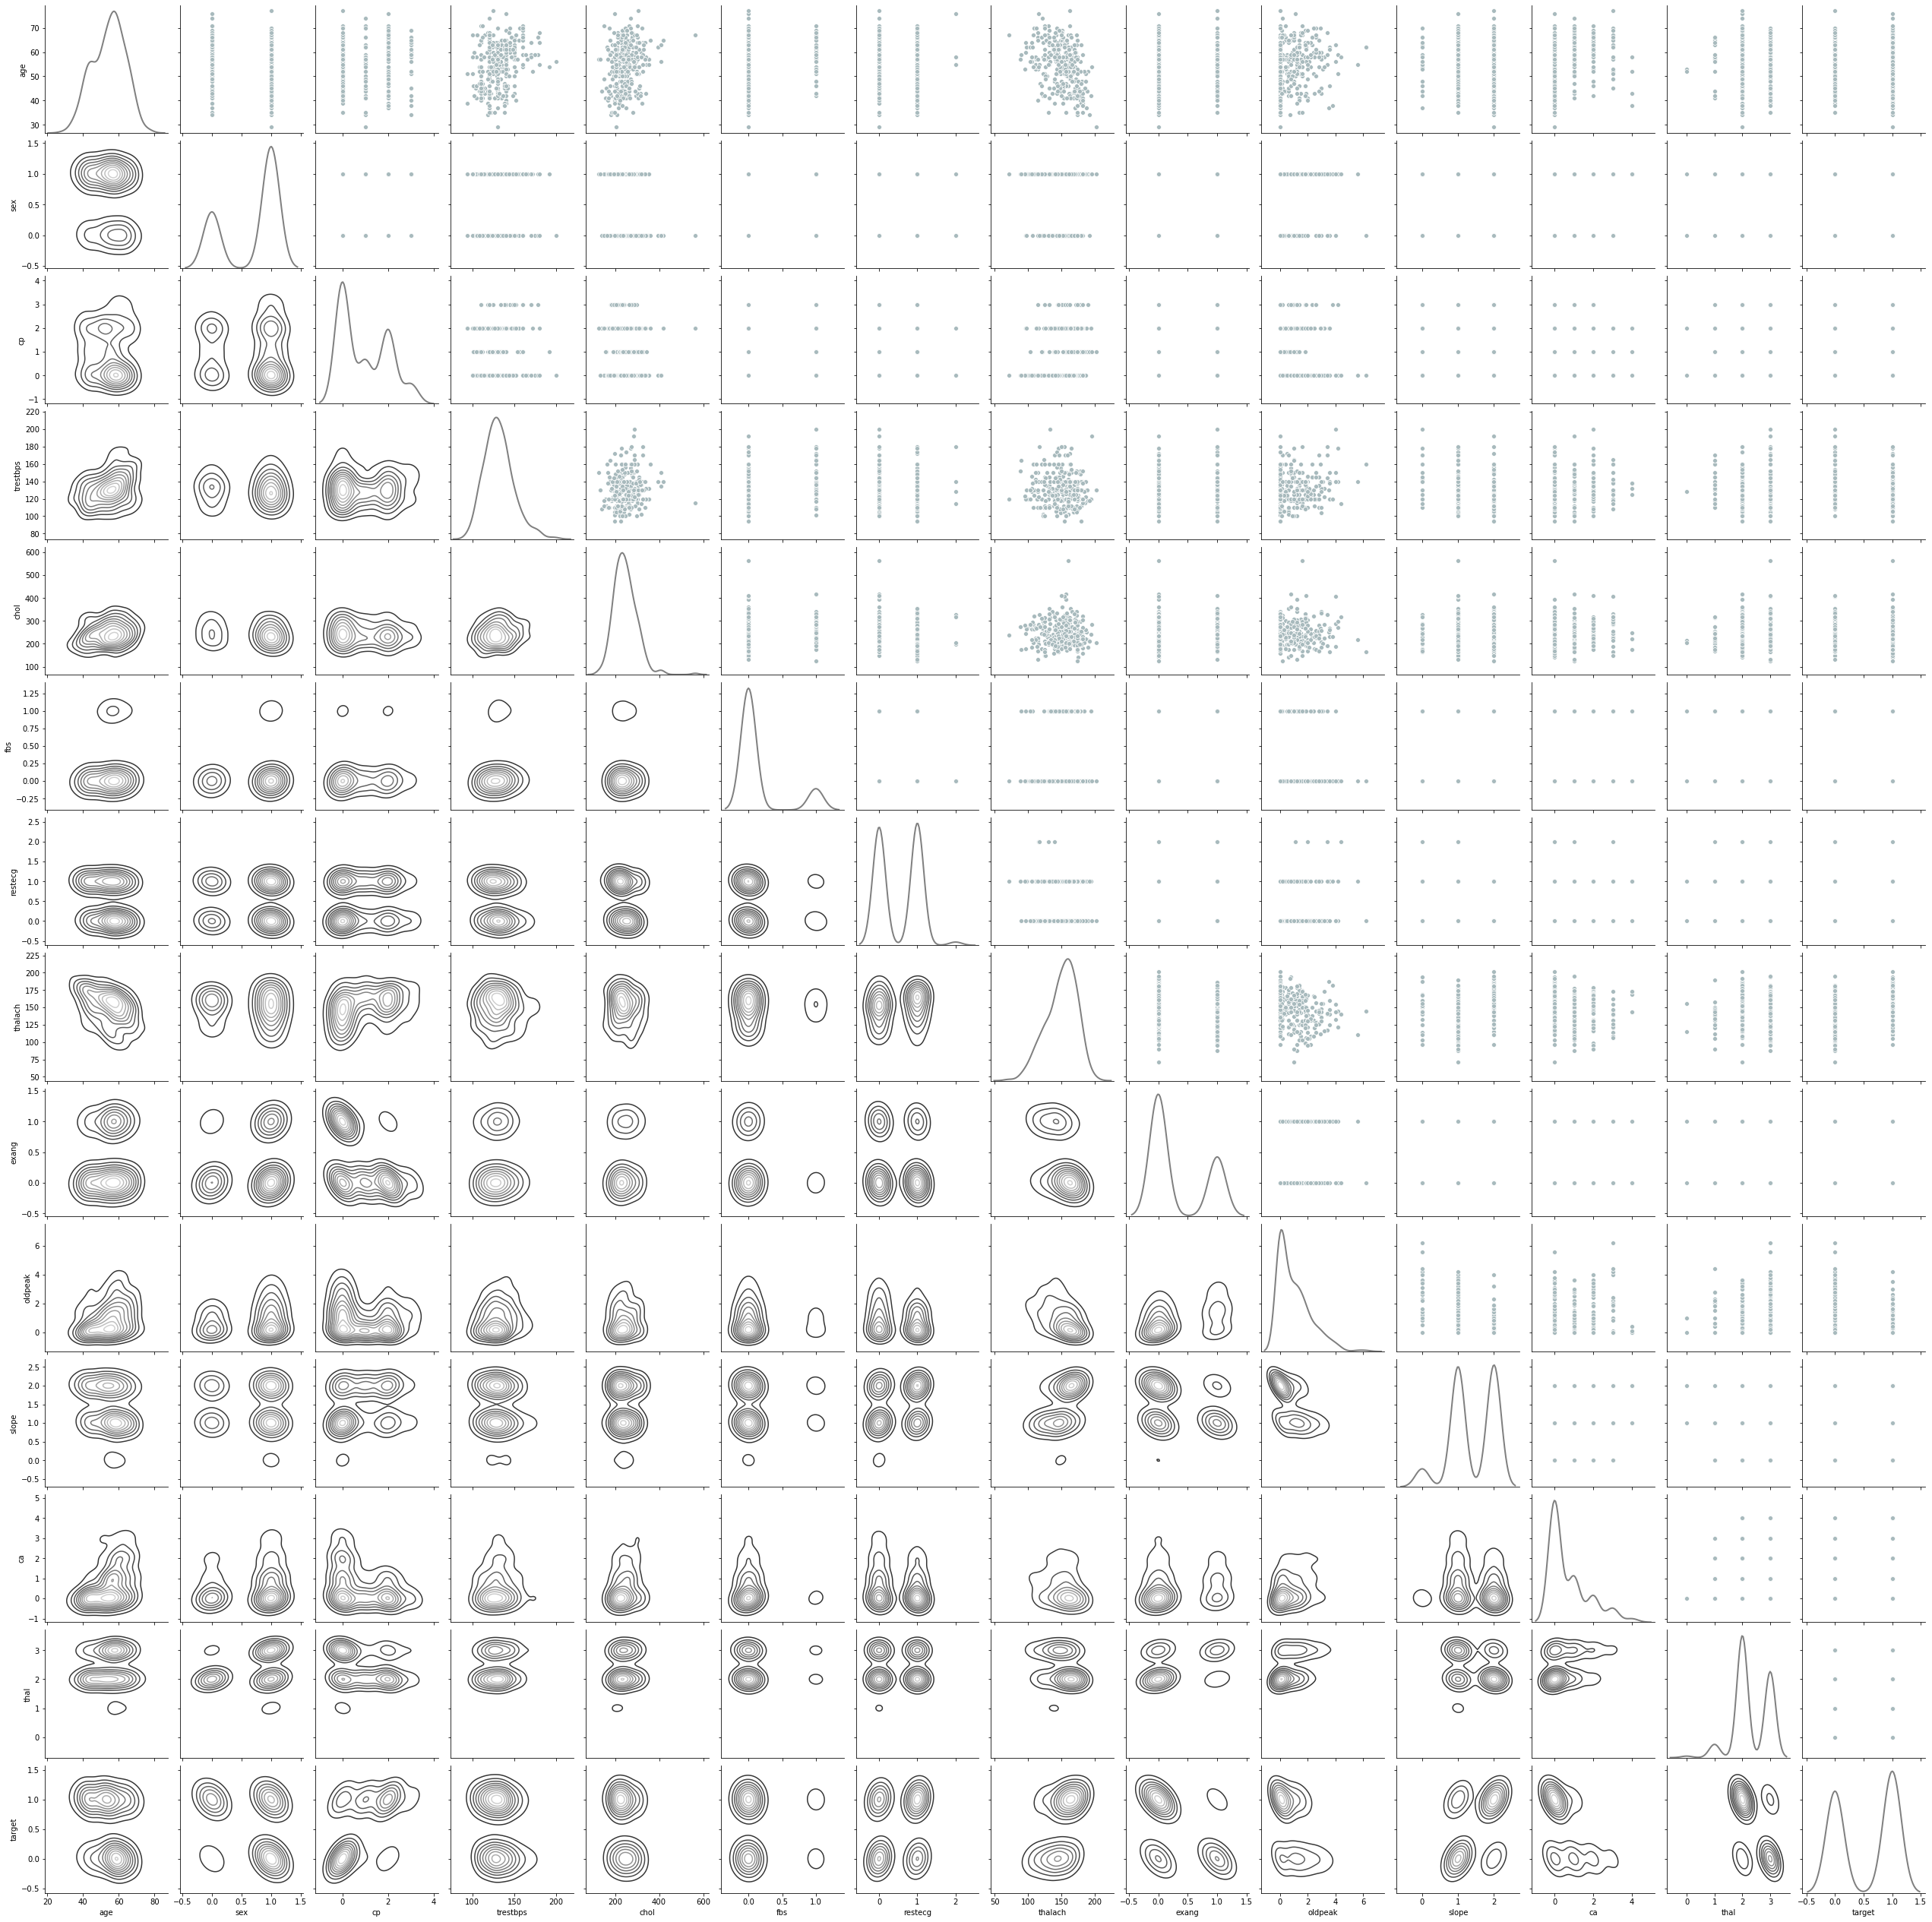

In [7]:
# análisis visual de las distribuciones, densidad de frecuencia y dispersión para cada variable numérica del dataset con el
# fin de determinar patrones, correlación, frecuencias entre otros insights entre variables
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, color=gris) # tipo de visualización para diagonal inferior
g.map_upper(sns.scatterplot, color=azul) # tipo de visualización para diagonal superior
g.map_diag(sns.kdeplot, lw=2,color='gray') # tipo de visualización para diagonal principal
plt.show()

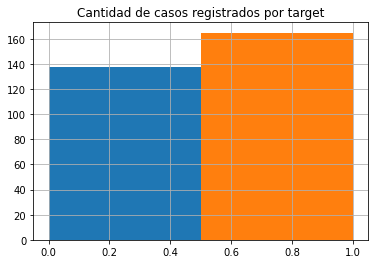

In [8]:
df.groupby('target')['target'].hist(bins=2, range=[0,1])
plt.title('Cantidad de casos registrados por target')
plt.show()

## Estandarización de los valores para  PCA
Con el fin de interpretar la influencia de cada variable de mejor manera.

In [9]:
vars_independientes = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal'
]

var_dependiente = [
    'target'
]

In [10]:
df_features = df[vars_independientes]
df_labels = df[var_dependiente]

In [11]:
sc = StandardScaler()
df_features_std = sc.fit_transform(df[vars_independientes])

In [12]:
df_features_std = pd.DataFrame(df_features_std)
df_features_std.columns = df_features.columns
df_features_std.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


# PCA
Con el fin de determinar la varianza de los componentes, y las variables que dan lugar a esa varianza.

In [13]:
from sklearn.decomposition import PCA

In [14]:
n_components=10

In [15]:
# Define number of principal components
#n_components=5
pca = PCA(n_components)

# Fit to features
pc = pca.fit_transform(df_features_std)

# Dataframe of principal components and wine labels
pc_df = pd.DataFrame(data = pc, columns = ["PC{}".format(str(i+1)) for i in range(n_components)])
pc_df['Cluster'] = df_labels
pc_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Cluster
0,0.624111,2.321270,2.474673,2.676239,0.375253,1.713567,-0.120352,0.736557,-0.638940,0.932651,1
1,-0.455988,-0.957351,1.139595,2.426838,2.273767,-0.787861,-0.081513,1.535384,1.241824,1.165681,1
2,-1.828805,0.042885,-0.452229,0.406415,0.867802,0.767551,-0.104852,-0.063523,1.293202,-1.147066,1
3,-1.716006,-0.495337,0.030631,-0.112162,-0.235598,-0.502665,-0.142754,-0.177462,-0.152965,0.706572,1
4,-0.371356,0.301156,-2.841069,-0.809042,0.011389,-0.085495,1.415596,0.607134,-0.186315,0.907423,1


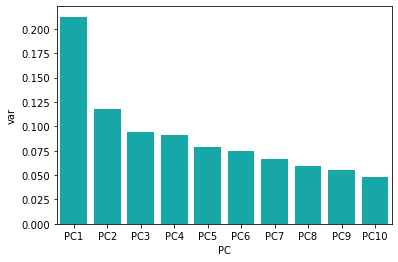

In [16]:
# Scree plot
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':["PC{}".format(str(i+1)) for i in range(n_components)]})
sns.barplot(x='PC',y="var", 
           data=pca_df, color="c")
plt.show()
# 1 componente principal explica el 20% de la varianza, esto significa que no existe un grupo de variables explicativas que 
# sean capaces de segmentar la varianza entre los targets

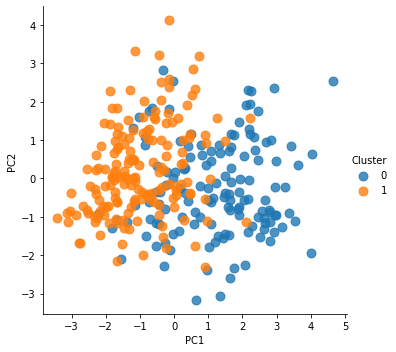

In [17]:
# Scatter plot primeros dos PCs categorizados por probabilidad alta o baja.
sns.lmplot( x="PC1", y="PC2",
  data=pc_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size
plt.show()

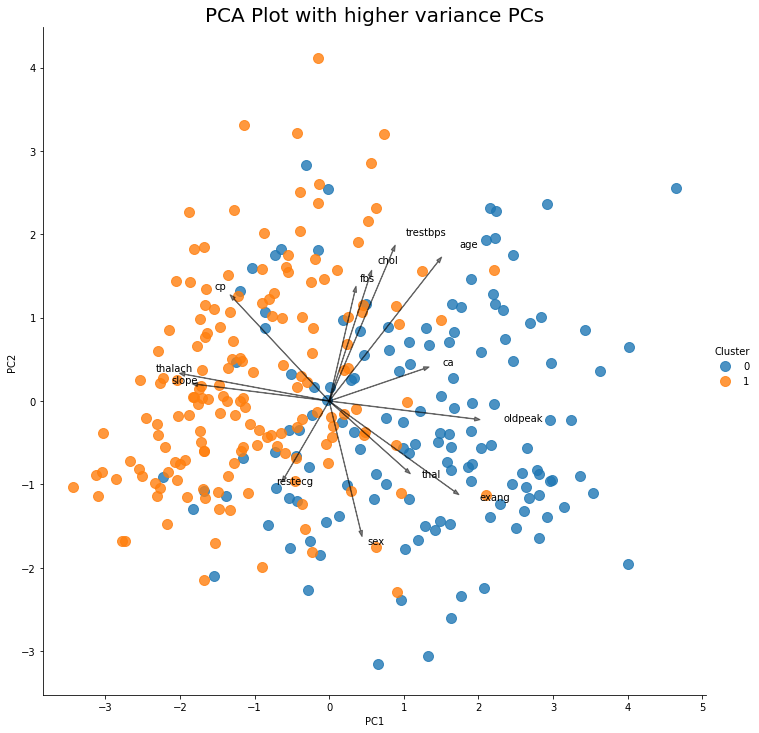

In [18]:
sns.lmplot('PC1', 'PC2', data=pc_df, fit_reg = False, height=10, hue = 'Cluster', scatter_kws={"s": 100})
 
xvector = pca.components_[0] # end point de cada vector dada la varianza de los PCs principales.
yvector = pca.components_[1]
 
# valores para los ejes del PC1 y PC2
xs = pca.transform(df_features_std)[:,0]
ys = pca.transform(df_features_std)[:,1]
 
## visualicion de las proyecciones
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    # we can adjust length and the size of the arrow
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys), color='k', width=0.005, head_width=0.05, alpha=0.5)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.1, list(df_features.columns.values)[i], color='k')

plt.title('PCA Plot with higher variance PCs',fontsize=20)
plt.show()

Los resultados del PCA, permiten observar variables explicativas que se encuentran correlacionadas entre sí. Lo que representa un problema de multicolinealidad que afectan el nivel de significancia estadística de cada variable. Por esta razón, se escogerá solo una variable de cada grupo correlacionado entre sí.

Las variables escogidas son:
* oldpeak
* exang
* sex
* restecg
* thalach
* cp
* trestbps
* age

De esta manera se reduce la dimensionalidad de 14 a 8.

# Regresión Logística

In [19]:
def h_teta(vector_x, vector_t): # esta funcion es h_zeta
    #zeta_teta = np.matmul(vector_t.T, vector_x)
    zeta_teta = np.matmul(vector_t.T, vector_x.T)
    #print('Zeta teta: ', zeta_teta) # si zeta >= 0; entonces clase positiva.
    #[5,4,-1] = 5 + 4x1-x2 = 0
    # x2 =  5 + 4x1

    return ((1 + np.power(np.e, -1*zeta_teta))**-1).T # (n,1)

def jota_teta(x, y, hipotesis, m, tetas):
    #h = hipotesis(tetas, x)
    #print('hipotesis: {}\n'.format(-np.log(h)))
    #print('y shape: {}\n'.format(y.shape))
    #print('h shape: {}\n'.format(h.shape))
    return (-1/float(m)) * (np.matmul(y.T, np.log(hipotesis) + np.matmul((1-y.T), np.log(1 - hipotesis))))

def gradiente(
        x,
        y,
        h,
        m,
        tetas,
    ):
    return (((np.matmul((h - y).T, x).T) / float(m)))

def descenso_gradiente(
        x_set: List[List[float]],
        y_set: List[float],
        #tetas_iniciales: List[float],
        hipotesis: Callable[[Any], Any],#[[List[float], List[float]], List[float]], # Callable[[parametros], resultado]
        gradiente: Callable[[Any], Any],#[[List[float], List[float], List[float], float], List[float]], # Callable[[parametros], resultado]
        max_iters: int = 10000,
        alpha: float = 0.0001,
        _lambda: float = 0.0,
        grado: int = 1
    ) -> List[float]:
    
    """Esta función ejecuta el descenso en gradiente para encontrar las tetas que minimizan el costo."""
    
    unos = np.ones(x_set.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.
    
    X = transformar_arreglo(x_set, grado)
    
    m, n = X.shape
    #y_set = y_set.reshape(m,1) # convertir a vector columna.
    #print(y_set[-10:])
    tetas = np.random.rand(n,1)

    for i in range(max_iters):
        h = hipotesis(X, tetas) # vector solucion (100,1)
        #print((h - ys).shape) # (100,1) - (100,1)
        tetas -= alpha * gradiente(X, y_set, h, m, tetas) 
    
    #costo = jota_teta(y_set, h, m)
    #y_pred = np.matmul(X,tetas)

    #return y_pred, tetas, costo.sum()
    return tetas # retorno X, ya que incluye la col de uno's, la cual será útil en cross validation.

def cross_validate(x_train, y_train, x_test, y_test, tetas):
    """ Calculo la validación cruzada para los tetas resultantes del train set sobre el test set."""
    
    m = x_train.shape[0]
    h_train = h_teta(x_train, tetas)
    h_test = h_teta(x_test, tetas)
    costo_train = jota_teta(x_train, y_train, h_train, m, tetas)
    costo_test = jota_teta(x_train, y_test, h_test, m, tetas)
    
    return [(costo_train, costo_test), (h_train, h_test)]

def transformar_arreglo(x_set, grado):
    
    unos = np.ones(x_set.shape[1]) # [1] ya que X viene en formato de filas, por lo que cada columna es una observacion.
    
    if grado == 1:
        X = np.vstack(
            (
            unos,
            x_set,
            #-x_set**2
            )
        ).T # Se transpuso la matriz para tener la columna de unos y asi calcular teta_0
    elif grado == 2:
        X = np.vstack(
            (
            unos,
            x_set,
            x_set**2
            )
        ).T
    elif grado == -2:
        X = np.vstack(
            (
            unos,
            x_set,
            -x_set**2
            )
        ).T
        
    return X

# Modelo 1

In [105]:
vars_independientes = [
    'oldpeak',
    'exang',
    'sex',
    'restecg',
    'thalach',
    'cp',
    'trestbps',
    'age'
]

var_dependiente = ['target']

In [106]:
# calculo del costo de unas coordeanadas sin error, para conocer si funciona bien la fx de costo.
t = np.array([[-3],[1],[1]])
x = np.array([[1,0,3], [2,1,4]])
y = np.array([[1], [0]])
h=h_teta(x,t)
-1/2 * ( np.matmul(y.T,np.log(h)) + np.matmul((1-y).T,(np.log(1-h))))
#jota_teta(x,y,h,2,t)
# si funciona bien

array([[0.50320443]])

In [107]:
seed=161

df_train, df_test = train_test_split(df, test_size=0.2, random_state=seed)

In [108]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [109]:
grado = 1
max_iters=90000
alpha=0.00015

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, grado=grado)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)


costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

In [110]:
costosPred1 = costos
costosPred1

(array([[31.77915219]]), array([[1.92052118]]))

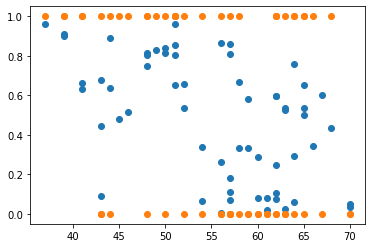

In [111]:
plt.scatter(df_test.age, pred_test)
plt.scatter(df_test.age, df_test.target)
plt.show()

In [112]:
i=1
df_train['pred_raw{}'.format(i)] = pred_train.T.tolist()[0]
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,0.688203
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,0.907025
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0,0.251515
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,0.099835
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0.073725


In [113]:
i = 1
df_test['pred_raw{}'.format(i)] = pred_test.T.tolist()[0]
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,0.802948
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.514167
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,0.747372
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0.062515
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.523522


In [114]:
df_train['pred{}'.format(i)] = df_train.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)
df_test['pred{}'.format(i)] = df_test.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)

In [115]:
i = 1
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTrain_modelo1 = (df_train.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_train.groupby(['target'])['age'].count())
confusionTrain_modelo1

target  pred1
0       0        0.706422
        1        0.293578
1       0        0.142857
        1        0.857143
Name: age, dtype: float64

In [116]:
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTest_modelo1 = df_test.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_test.groupby(['target'])['age'].count()
confusionTest_modelo1

target  pred1
0       0        0.689655
        1        0.310345
1       0        0.218750
        1        0.781250
Name: age, dtype: float64

# Modelo 2
Utilizando las variables que no se utilizaron en el modelo 1.

In [117]:
vars_independientes = [
    #'age',
    #'sex',
    #'cp',
    #'trestbps',
    'chol',
    'fbs',
    #'restecg',
    #'thalach',
    #'exang',
    #'oldpeak',
    'slope',
    'ca',
    'thal'
]


In [118]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [119]:
grado = 1
max_iters=90000
alpha=0.00015

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, grado=grado)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)


costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

# almacenando resultados para la seleccion del mejor modelo. 
#pred_train_modelo1_CGPA = pred_train
#pred_test_modelo1_CGPA = pred_test
#costo_modelo1_CGPA = costo_test
#tetas_modelo1 = tetas

In [120]:
costosPred2 = costos
costosPred2

(array([[36.16359557]]), array([[1.71243829]]))

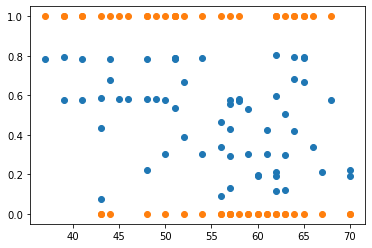

In [121]:
plt.scatter(df_test.age, pred_test)
plt.scatter(df_test.age, df_test.target)
plt.show()

In [122]:
i=2
df_train['pred_raw{}'.format(i)] = pred_train.T.tolist()[0]
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1,pred1,pred_raw2
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,0.688203,1,0.679823
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,0.907025,1,0.253471
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0,0.251515,0,0.579728
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,0.099835,0,0.533703
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0.073725,0,0.134804


In [123]:
i = 2
df_test['pred_raw{}'.format(i)] = pred_test.T.tolist()[0]
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1,pred1,pred_raw2
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,0.802948,1,0.579828
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.514167,1,0.579627
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,0.747372,1,0.786187
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0.062515,0,0.421244
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.523522,1,0.505161


In [124]:
df_train['pred{}'.format(i)] = df_train.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)
df_test['pred{}'.format(i)] = df_test.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)

In [125]:
i = 2
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTrain_modelo2 = df_train.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_train.groupby(['target'])['age'].count()
confusionTrain_modelo2

target  pred2
0       0        0.678899
        1        0.321101
1       0        0.180451
        1        0.819549
Name: age, dtype: float64

In [126]:
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTest_modelo2 = df_test.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_test.groupby(['target'])['age'].count()
confusionTest_modelo2

target  pred2
0       0        0.827586
        1        0.172414
1       0        0.093750
        1        0.906250
Name: age, dtype: float64

# Modelo 3 
Utilizando todas las variables.

In [127]:
vars_independientes = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal'
]

var_dependiente = [
    'target'
]

In [128]:
x_train = np.array([df_train['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_train = np.array(df_train[var_dependiente])

x_test = np.array([df_test['{}'.format(vars_independientes[i])] for i in range(len(vars_independientes))])
y_test = np.array(df_test[var_dependiente])

In [129]:
grado = 1
max_iters=60000
alpha=0.00015

tetas = descenso_gradiente(x_train, y_train, h_teta, gradiente, max_iters=max_iters, alpha=alpha, grado=grado)

X_train = transformar_arreglo(x_train, grado)

X_test = transformar_arreglo(x_test, grado)


costos, predicciones = cross_validate(X_train, y_train, X_test, y_test, tetas)
costo_train, costo_test = costos
pred_train, pred_test = predicciones

# almacenando resultados para la seleccion del mejor modelo. 
#pred_train_modelo1_CGPA = pred_train
#pred_test_modelo1_CGPA = pred_test
#costo_modelo1_CGPA = costo_test
#tetas_modelo1 = tetas

In [138]:
costosPred3 = costos
costosPred3

(array([[14.75458624]]), array([[0.69583217]]))

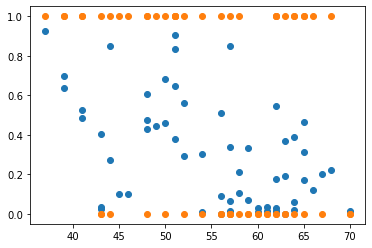

In [131]:
plt.scatter(df_test.age, pred_test)
plt.scatter(df_test.age, df_test.target)
plt.show()

In [132]:
i=3
df_train['pred_raw{}'.format(i)] = pred_train.T.tolist()[0]
df_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1,pred1,pred_raw2,pred2,pred_raw3
277,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,0.688203,1,0.679823,1,0.479380
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1,0.907025,1,0.253471,0,0.596188
258,62,0,0,150,244,0,1,154,1,1.4,1,0,2,0,0.251515,0,0.579728,1,0.084111
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0,0.099835,0,0.533703,1,0.042622
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0,0.073725,0,0.134804,0,0.024168


In [133]:
i = 3
df_test['pred_raw{}'.format(i)] = pred_test.T.tolist()[0]
df_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1,pred1,pred_raw2,pred2,pred_raw3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,0.802948,1,0.579828,1,0.473289
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.514167,1,0.579627,1,0.101646
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,0.747372,1,0.786187,1,0.608855
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0.062515,0,0.421244,0,0.019459
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.523522,1,0.505161,1,0.368828


In [134]:
df_train['pred{}'.format(i)] = df_train.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)
df_test['pred{}'.format(i)] = df_test.apply(lambda x: 1 if (x['pred_raw{}'.format(i)] >= 0.5) else 0, axis=1)
df_test.head(15)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,pred_raw1,pred1,pred_raw2,pred2,pred_raw3,pred3
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1,0.802948,1,0.579828,1,0.473289,0
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2,1,0.514167,1,0.579627,1,0.101646,0
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1,0.747372,1,0.786187,1,0.608855,1
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1,0,0.062515,0,0.421244,0,0.019459,0
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,0.523522,1,0.505161,1,0.368828,0
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0,0.285549,0,0.195494,0,0.028981,0
178,43,1,0,120,177,0,0,120,1,2.5,1,0,3,0,0.089818,0,0.432614,0,0.036220,0
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1,0.675335,1,0.585645,1,0.403331,0
52,62,1,2,130,231,0,1,146,0,1.8,1,3,3,1,0.595216,1,0.115481,0,0.178777,0
105,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1,0.437081,0,0.576408,1,0.220876,0


In [135]:
i = 3
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTrain_modelo3 = (df_train.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_train.groupby(['target'])['age'].count())
confusionTrain_modelo3

target  pred3
0       0        0.889908
        1        0.110092
1       0        0.375940
        1        0.624060
Name: age, dtype: float64

In [136]:
i=3
# Matriz de confusión de falsos positvos, falsos negativos y correctos.
confusionTest_modelo3 = df_test.groupby(['target', 'pred{}'.format(i)])['age'].count() / df_test.groupby(['target'])['age'].count()
confusionTest_modelo3

target  pred3
0       0        1.0000
1       0        0.5625
        1        0.4375
Name: age, dtype: float64

# Resultados

In [140]:
trainPred3, testPred3 = costosPred3

In [141]:
trainPred2, testPred2 = costosPred2

In [142]:
trainPred1, testPred1 = costosPred1

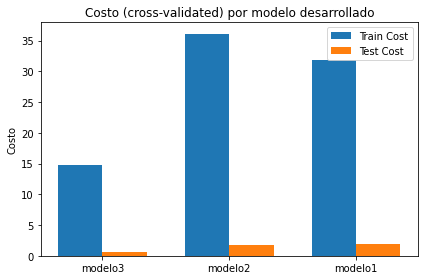

In [148]:
labels = ['modelo3', 'modelo2', 'modelo1']
TrainCost = [trainPred3.tolist()[0][0],trainPred2.tolist()[0][0], trainPred1.tolist()[0][0]]
TestCost = [testPred3.tolist()[0][0], testPred2.tolist()[0][0], testPred1.tolist()[0][0]]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, TrainCost, width, label='Train Cost')
rects2 = ax.bar(x + width/2, TestCost, width, label='Test Cost')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Costo')
ax.set_title('Costo (cross-validated) por modelo desarrollado')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [147]:
costosPred1, costosPred2, costosPred3

((array([[31.77915219]]), array([[1.92052118]])),
 (array([[36.16359557]]), array([[1.71243829]])),
 (array([[14.75458624]]), array([[0.69583217]])))

In [152]:
print('Matriz de confusión para el modelo 3')
confusionTest_modelo3

Matriz de confusión para el modelo 3


target  pred3
0       0        1.0000
1       0        0.5625
        1        0.4375
Name: age, dtype: float64

In [150]:
print('Matriz de confusión para el modelo 2')
confusionTest_modelo2

target  pred2
0       0        0.827586
        1        0.172414
1       0        0.093750
        1        0.906250
Name: age, dtype: float64

In [153]:
print('Matriz de confusión para el modelo 1')
confusionTest_modelo1

Matriz de confusión para el modelo 1


target  pred1
0       0        0.689655
        1        0.310345
1       0        0.218750
        1        0.781250
Name: age, dtype: float64

El mejor modelo, que, a pesar de tener un costo alto para el train set, proporciona la mejor combinación de acertos porcentuales respecto al target, medidos a través de su matriz de confusión, es el **modelo 2**. Este modelo presenta la menor cantidad proporcional de falsos positivos y falsos negativos, lo que se traduce a mejor specificidad y sensibilidad del modelo. Por esta razón se escoge dicho modelo como el más ideal. 